In [1]:
import os
import shutil

In [2]:
print(os.getcwd())
#os.chdir("Open_SLR_data/wav/")
print(os.getcwd())

C:\Users\trist\PycharmProjects\AudioMNIST
C:\Users\trist\PycharmProjects\AudioMNIST


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer
from sklearn.model_selection import train_test_split


In [4]:
gpus = tf.config.list_physical_devices('GPU')
gpu = gpus[0]

tf.config.experimental.set_memory_growth(gpu, True)

## All wav files have been transform to 16bits

In [5]:
# Prepare the data for a DF to match Keras tutorial

print(os.getcwd())
#C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\wav_one_word
os.chdir("C://Users//trist//PycharmProjects//AudioMNIST//Open_SLR_data//wav_all_16_bits")
print(os.getcwd())

wav_files = [f for f in os.listdir(os.getcwd())]
print(wav_files)


C:\Users\trist\PycharmProjects\AudioMNIST
C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\wav_all_16_bits
['F01_a1_s001_v01.wav', 'F01_a1_s001_v02.wav', 'F01_a1_s001_v03.wav', 'F01_a1_s001_v04.wav', 'F01_a1_s001_v05.wav', 'F01_a1_s001_v06.wav', 'F01_a1_s002_v01.wav', 'F01_a1_s002_v02.wav', 'F01_a1_s002_v03.wav', 'F01_a1_s002_v04.wav', 'F01_a1_s002_v05.wav', 'F01_a1_s003_v01.wav', 'F01_a1_s003_v02.wav', 'F01_a1_s003_v03.wav', 'F01_a1_s003_v04.wav', 'F01_a1_s003_v05.wav', 'F01_a1_s004_v01.wav', 'F01_a1_s004_v02.wav', 'F01_a1_s004_v03.wav', 'F01_a1_s004_v04.wav', 'F01_a1_s005_v01.wav', 'F01_a1_s005_v02.wav', 'F01_a1_s005_v03.wav', 'F01_a1_s005_v04.wav', 'F01_a1_s005_v05.wav', 'F01_a1_s006_v01.wav', 'F01_a1_s006_v02.wav', 'F01_a1_s006_v03.wav', 'F01_a1_s007_v01.wav', 'F01_a1_s007_v02.wav', 'F01_a1_s007_v03.wav', 'F01_a1_s007_v04.wav', 'F01_a1_s007_v05.wav', 'F01_a1_s008_v01.wav', 'F01_a1_s008_v02.wav', 'F01_a1_s008_v03.wav', 'F01_a1_s009_v01.wav', 'F01_a1_s009_v02.wav', 'F01_a1_s00

In [6]:
os.chdir("C://Users//trist/PycharmProjects//AudioMNIST//Open_SLR_data//txt")
print(os.getcwd())

txt_files = [f for f in os.listdir(os.getcwd())]
#print(txt_files)
wav_labels = []
for txt in txt_files:
    myfile = open(txt, "rt", encoding="utf-8") # open lorem.txt for reading text
    text = myfile.read()
    text = text.replace("é","e")
    text = text.replace("è","e")
    text = text.replace("à","a")
    text = text.replace("û","u")
    text = text.replace("ê","e")
    text = text.replace("’","'")
    text = text.replace("ô","o")
    wav_labels.append(text)         # read the entire file to string
    myfile.close()                   # close the file
print(wav_labels)                  # print string contentsm

C:\Users\trist\PycharmProjects\AudioMNIST\Open_SLR_data\txt
['oui', 'oui', 'oui', 'oui', 'oui', 'oui', 'non', 'non', 'non', 'non', 'non', 'certes', 'certes', 'certes', 'certes', 'certes', 'bien-sur', 'bien-sur', 'bien-sur', 'bien-sur', 'salut', 'salut', 'salut', 'salut', 'salut', 'bonjour', 'bonjour', 'bonjour', 'bonsoir', 'bonsoir', 'bonsoir', 'bonsoir', 'bonsoir', 'tant pis', 'tant pis', 'tant pis', 'tres bien', 'tres bien', 'tres bien', 'tres bien', "c'est vrai", "c'est vrai", "c'est vrai", 'par ici', 'par ici', 'par ici', 'par ici', 'par ici', 'par ici', 'au revoir', 'au revoir', 'au revoir', 'a demain', 'a demain', 'a demain', 'a demain', 'a demain', 'impossible', 'impossible', 'impossible', 'impossible', 'volontiers', 'volontiers', 'volontiers', 'volontiers', "j'ai tousse", "j'ai tousse", "j'ai tousse", "j'ai tousse", "j'ai tousse", 'peu importe', 'peu importe', 'peu importe', 'peu importe', 'peu importe', 'nous partons', 'nous partons', 'nous partons', 'nous partons', 'nous part

In [7]:
## put that in pandas DF
data_wav = {'wav': wav_files, 'labels': wav_labels}
df_one_word = pd.DataFrame(data=data_wav)
df_one_word

,wav,labels
0,F01_a1_s001_v01.wav,oui
1,F01_a1_s001_v02.wav,oui
2,F01_a1_s001_v03.wav,oui
3,F01_a1_s001_v04.wav,oui
4,F01_a1_s001_v05.wav,oui
...,...,...
36647,vad_emilie_2.wav,vous avez dormi
36648,vad_norbert_1.wav,vous avez dormi
36649,vad_norbert_2.wav,vous avez dormi
36650,vad_tristan_1.wav,vous avez dormi


In [8]:
#Split train validate with shuffle

X= data_wav['wav']
y= data_wav['labels']
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                          random_state=104,
                          train_size=0.8, shuffle=True)


In [9]:
y_train

['laisse moi une deuxieme chance',
 'vous avez pris le temps',
 'il fait beau ce soir a paris',
 'peu importe',
 "c'est vrai attendons un peu",
 'vous etes partis en week-end',
 'je prends le temps',
 'bonsoir jeanne',
 'bonne journee marie',
 'donne leur une chance',
 'ta soeur a bu',
 'a demain paul',
 'je suis parti sans trainer',
 'tu as pris la fuite',
 'elle est partie pour bale',
 'tu as fait ce que je voulais',
 'sans aucun doute',
 "tu es parti pour l'espagne",
 'je suis parti sans trainer',
 'elle est partie en vacances',
 'nous avons chante',
 'je suis parti sans trainer',
 'vous avez pris le temps',
 'faisons leur confiance',
 'elle est allee a la montagne',
 'tu as pris la fuite',
 'oui',
 'bonne journee',
 'donne moi une reponse',
 'elle a oublie ma fete',
 'faisons leur confiance',
 'au revoir yann',
 'faites leur signe',
 'elle a dit ce que je voulais',
 "c'est vrai",
 'bonne journee marie',
 'veuillez me croire',
 'il est midi',
 'elle a dit ce que je voulais',
 'tu as

In [10]:
#Create 2 df for train and validate
df_train = {'wav': X_train, 'labels': y_train}
df_val = {'wav': X_test, 'labels': y_test}

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the training set: {len(df_val)}")

Size of the training set: 2
Size of the training set: 2


In [11]:
# The set of characters accepted in the transcription.
characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]
# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', ' '] (size =31)


In [12]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384

wavs_path ="C://Users//trist//PycharmProjects//AudioMNIST//Open_SLR_data//wav_all_16_bits//"
def encode_single_sample(wav_file, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wavs_path+ wav_file)
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.reshape(audio, [-1, 1])
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label

In [13]:
encode_single_sample("F01_a1_s001_v01.wav", "oui")

(<tf.Tensor: shape=(578, 193), dtype=float32, numpy=
 array([[ 8.621864  ,  7.242698  ,  3.7987602 , ..., -0.7353963 ,
         -0.8281569 , -0.85589486],
        [ 8.790233  ,  7.547415  ,  4.3677106 , ..., -0.54714453,
         -0.573904  , -0.5934816 ],
        [ 9.1510315 ,  7.6045866 ,  3.7125394 , ..., -0.6117307 ,
         -0.578908  , -0.5682665 ],
        ...,
        [ 8.330263  ,  7.03482   ,  3.754446  , ..., -0.7310742 ,
         -0.74117285, -0.78450125],
        [ 8.033449  ,  6.8381305 ,  3.8985076 , ..., -0.8204044 ,
         -0.851755  , -0.8596926 ],
        [ 7.799883  ,  6.8002524 ,  4.352425  , ..., -0.78927493,
         -0.7242967 , -0.7051345 ]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=int64, numpy=array([15, 21,  9], dtype=int64)>)

In [14]:
batch_size = 10
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["wav"]), list(df_train["labels"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["wav"]), list(df_val["labels"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

tf.Tensor(
[12  1  9 19 19  5 30 13 15  9 30 21 14  5 30  4  5 21 24  9  5 13  5 30
  3  8  1 14  3  5], shape=(30,), dtype=int64)


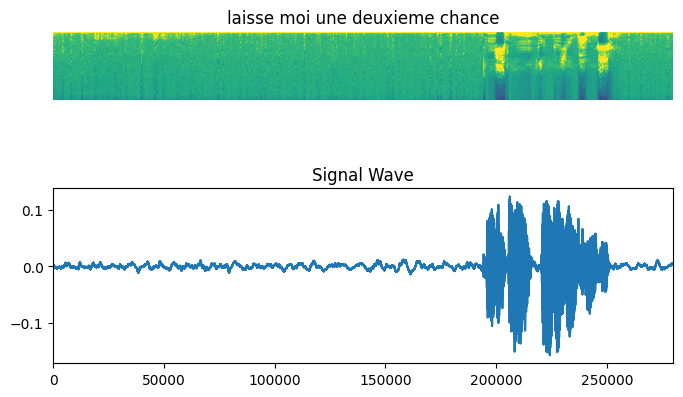

In [15]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    print(label)
    # Spectrogram
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")
    # Wav
    file = tf.io.read_file(wavs_path + list(df_train["wav"])[0])
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

In [16]:
def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [17]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim), name="input")
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    # Model
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model


# Get the model
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

In [18]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

def decode_predictions(pred):
    input_len = np.ones(pred.shape[0])
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

# A callback class to output a few transcriptions during training
class CallbackEval(keras.callbacks.Callback):
    """Displays a batch of outputs after every epoch."""

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        if epoch % 10 == 1:
            predictions = []
            targets = []
            for batch in self.dataset:
                X, y = batch
                batch_predictions = model.predict(X)
                batch_predictions = decode_batch_predictions(batch_predictions)
                predictions.extend(batch_predictions)
                for label in y:
                    label = (
                        tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                    )
                    targets.append(label)
            wer_score = wer(targets, predictions)
            print("-" * 100)
            print(f"Word Error Rate: {wer_score:.4f}")
            print("-" * 100)
            for i in np.random.randint(0, len(predictions), 2):
                print(f"Target    : {targets[i]}")
                print(f"Prediction: {predictions[i]}")
                print("-" * 100)

In [19]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 193), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [20]:
# Define the number of epochs.
epochs = 51
# Callback function to check transcription on the val set.
validation_callback = CallbackEval(validation_dataset)
metric = 'val_accuracy'

checkpoint_filepath = 'C://Users//trist//PycharmProjects//AudioMNIST//Saved_Model_OPEN_SLR//model_51_epochs.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor=metric,
    mode='max',
    save_best_only=True)

os.chdir("C://Users//trist/PycharmProjects//AudioMNIST")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs_51_epochs")
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[tensorboard_callback, validation_callback],
)


Epoch 1/51
2933/2933 [==============================] - 3899s 1s/step - loss: 45.2354 - val_loss: 20.0812
Epoch 2/51
1/1 [==============================] - 0s 87ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.2284
----------------------------------------------------------------------------------------------------
Target    : je pars ce soir
Prediction: je pares ce soir
----------------------------------------------------------------------------------------------------
Target    : impossible
Prediction: impossible
----------------------------------------------------------------------------------------------------
2933/2933 [==============================] - 2182s 744ms/step - loss: 12.2133 - val_loss: 7.5719
Epoch 3/51
2933/2933 [==============================] - 2030s 692ms/step - loss: 6.8214 - val_loss: 5.6922
Epoch 4/51
2933/2933 [==============================] - 2038s 695ms/step - loss: 5.2681 - val_lo

In [21]:
model.save_weights('C://Users//trist//PycharmProjects//AudioMNIST//Saved_Model_OPEN_SLR//model_51_epochs.hdf5')

In [22]:
from create_model_DeepSpeech2 import *
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)

ValueError: The name "dense_1" is used 2 times in the model. All layer names should be unique.

In [ ]:
## PARTIE VALIDATION PRÉDICTION
# on recharge les poids du model ainsi qu'une ou plusieurs donnée jamais vu pour voir si le model arrive à re transcrire

checkpoint_filepath = 'C://Users//trist//PycharmProjects//AudioMNIST//Saved_Model_OPEN_SLR//model_51_epochs.hdf5'

model.load_weights(checkpoint_filepath)

In [23]:
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)

1/1 [==============================] - 0s 94ms/step
----------------------------------------------------------------------------------------------------
Word Error Rate: 0.0467
----------------------------------------------------------------------------------------------------
Target    : elle est partie pour bale
Prediction: elle est atie pour bale
----------------------------------------------------------------------------------------------------
Target    : je suis parti loin d'ici
Prediction: je suis parti loin d'ici
----------------------------------------------------------------------------------------------------
Target    : vous etes alles a la plage
Prediction: vous etes alles a la plage
----------------------------------------------------------------------------------------------------
Target    : bonne journee marie
Prediction: bonne journeee marie
----------------------------------------------------------------------------------------------------
Target    : il faisait froi

# https://keras.io/examples/audio/ctc_asr/

In [ ]:
validation_dataset

# tensorboard dev upload --logdir logs